In [12]:
# always execute this cell first
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime
from colorama import Fore, Back, Style

pd.set_option('display.max_colwidth',None) # display max columns of CSV
pd.set_option('display.max_rows',None) # display maximum  rows of CSV
twitter_df = pd.read_csv('data/twitter_data.csv')
reddit_df = pd.read_csv('data/reddit_data.csv')

#### Functions


In [4]:

def add_readable_datetime(dataFrame):
    dataFrame['datetime']=pd.to_datetime(dataFrame['posted_time'].astype(np.int64),unit='s')
    return dataFrame

def print_sentiment_anayled_piechart_of_coin(start_dateObj,end_dateObj,dataFrame,coinName):
    dataFrame=add_readable_datetime(dataFrame)
    current_date=start_dateObj
    while current_date<=end_dateObj:
        filtered_df=dataFrame[(dataFrame['coin_name']==coinName) & (dataFrame['datetime'].dt.date==current_date)]
        if not filtered_df.empty:
            ones = filtered_df['label'].value_counts().get(1, 0)
            zeros = filtered_df['label'].value_counts().get(0, 0)
            neg_ones = filtered_df['label'].value_counts().get(-1, 0)

            ones = 0 if pd.isna(ones) else ones
            zeros = 0 if pd.isna(zeros) else zeros
            neg_ones = 0 if pd.isna(neg_ones) else neg_ones
            
            slices=[ones,zeros,neg_ones]
            labelNames=['positives','neutral','negatives']

            plt.pie(slices,labels=labelNames,wedgeprops={'edgecolor':'black'},autopct='%1.0f%%')
            plt.title(f"{current_date} chart")

            plt.show()
            print(f"postives={ones}, neutral={zeros}, negatives={neg_ones}")
            display(filtered_df.sort_values('datetime',ascending=False) )
        else:
            print('\nthe dataframe is empty in this day:',current_date)

        current_date += datetime.timedelta(days=1) # increment day by day


def print_all_sorted_posts(dataFrame):
    dataFrame=dataFrame.sort_values(by='posted_time',ascending=False)
    dataFrame=add_readable_datetime(dataFrame)
    return dataFrame


def print_info_of_coin(dataFrame,coinName):
    dataFrame=dataFrame.sort_values(by='posted_time',ascending=False)
    dataFrame=add_readable_datetime(dataFrame)
    filt = (dataFrame['coin_name'] == coinName)
    return dataFrame[filt]


def print_posts_of_given_date(dataFrame,givenDate,coinName):
    dataFrame=add_readable_datetime(dataFrame)
    filtered_df=twitter_df[(dataFrame['coin_name']==coinName) & (dataFrame['datetime'].dt.date==givenDate)]
    return filtered_df


def print_sorted_reddit_posts_acording_to_column(start_dateObj,end_dateObj,columnNumber):
    columnName=""
    if columnNumber == 1:
        columnName="upvote_ratio"
    elif columnNumber == 2:
        columnName="post_score"
    elif columnNumber == 3:
        columnName="num_comments"

    dataFrame=add_readable_datetime(pd.read_csv('data/reddit_data.csv'))
    result_df =pd.DataFrame()  # Initialize an empty DataFrame to store the result
    current_date=end_dateObj
    while current_date>=start_dateObj:
        filtered_df=dataFrame[ (dataFrame['datetime'].dt.date==current_date)]
        filtered_df=filtered_df.sort_values([columnName,'datetime'],ascending=[False,False])  
        if not filtered_df.empty:
            display(filtered_df.head(40))
        
        else:
            print('\nthe dataframe is empty in this day:',current_date)

        current_date -= datetime.timedelta(days=1) # increment day by day


def print_sorted_twitter_posts_acording_to_column(start_dateObj,end_dateObj,columnNumber):
    columnName=""
    if columnNumber == 1:
        columnName="likes"
    elif columnNumber == 2:
        columnName="replies"
    elif columnNumber == 3:
        columnName="views"
    elif columnNumber == 4:
        columnName="retweets"    

    dataFrame=add_readable_datetime(pd.read_csv('data/twitter_data.csv'))
    result_df =pd.DataFrame()  # Initialize an empty DataFrame to store the result
    current_date=end_dateObj
    while current_date>=start_dateObj:
        filtered_df=dataFrame[ (dataFrame['datetime'].dt.date==current_date)]
        filtered_df=filtered_df.sort_values([columnName,'datetime'],ascending=[False,False])  
        if not filtered_df.empty:
            display(filtered_df.head(40))
        
        else:
            print('\nthe dataframe is empty in this day:',current_date)

        current_date -= datetime.timedelta(days=1) # increment day by day




# def print_sorted_reddit_posts_acording_to_column_2(start_dateObj,end_dateObj,columnNumber):
#     #find column
#     columnName=1
#     if columnNumber == 1:
#         columnName="upvote_ratio"
#     elif columnNumber == 2:
#         columnName="post_score"
#     elif columnNumber == 3:
#         columnName="num_comments"
 
#     dataFrame=add_readable_datetime(reddit_df)
#     mask=(dataFrame['datetime']>=start_dateObj) & (dataFrame['datetime']<=end_dateObj)
#     dataFrame=dataFrame.loc[mask]
    
#     filtered_df=dataFrame.sort_values([columnName,'datetime'],ascending=[False,False])  
#     return filtered_df.head(100)



#### Coin Names
```
BTC
ETH *+
ETC
Avalanche(AVAX)
Solana(SOL) *+
Monero(XMR) *+
Optimism(OP)
PAX Gold(PAXG) 
Ripple(XRP) *+
Arbitrum(ARB)
Binance(BNB) *-
Cardano(ADA)
Cosmos(ATOM)
Litecoin(LTC) *+
Chainlink(LINK) *+
Aave(AAVE)
Polygon(MATIC)
```

#### Get Sorted all  data

- #####  Reddit

In [ ]:
# upvote_ratio=1,post_score=2,num_comments=3
print_sorted_reddit_posts_acording_to_column(start_dateObj=datetime.date(2023,10,24),end_dateObj=datetime.date(2023,10,25),columnNumber=3)

In [ ]:
print_info_of_coin(dataFrame=reddit_df,coinName='ETH')

- #####  Twitter


In [ ]:
# likes=1,replies=2,views=3,retweets=4
print_sorted_twitter_posts_acording_to_column(start_dateObj=datetime.date(2023,10,24),end_dateObj=datetime.date(2023,10,25),columnNumber=2)

In [ ]:
print_info_of_coin(dataFrame=twitter_df,coinName='ETH')

#### Sentiment Analysis chart 




BTC
Reddit Data


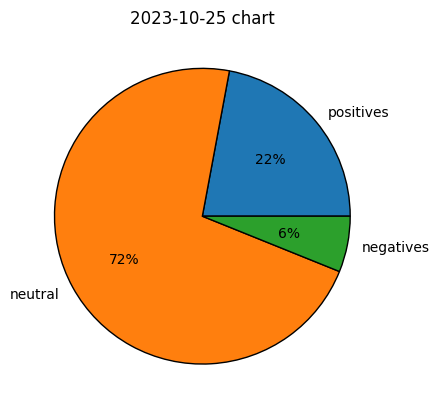

postives=47, neutral=153, negatives=13


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2561,Seeking Advice on Buying Bitcoin in the UK,1.698278e+09,1.00,3,10,BTC,0,2023-10-25 23:54:52
2774,I f’d up. (x-post from /r/Bitcoin),1.698277e+09,1.00,1,0,BTC,0,2023-10-25 23:40:55
2775,Bitcoin cannot make you rich (x-post from /r/Bitcoin),1.698277e+09,1.00,1,0,BTC,-1,2023-10-25 23:40:55
2562,Getting BTC out of WealthSimple into Green,1.698277e+09,1.00,1,4,BTC,0,2023-10-25 23:39:11
2777,Seed phrase and wallets (x-post from /r/Bitcoin),1.698275e+09,1.00,1,0,BTC,0,2023-10-25 23:00:51
2776,advice for a newbie (x-post from /r/Bitcoin),1.698275e+09,1.00,1,0,BTC,0,2023-10-25 23:00:51
2779,I just don’t understand why no one can tell me what happened to my bitcoin (x-post from /r/Bitcoin),1.698272e+09,1.00,1,0,BTC,-1,2023-10-25 22:20:47
2781,I deposited another 1.5 Bitcoin today. (x-post from /r/Bitcoin),1.698272e+09,1.00,1,0,BTC,0,2023-10-25 22:20:46
2780,Ibtc (x-post from /r/Bitcoin),1.698272e+09,1.00,1,0,BTC,0,2023-10-25 22:20:46
2782,BITCOIN (x-post from /r/Bitcoin),1.698272e+09,1.00,1,0,BTC,0,2023-10-25 22:20:45


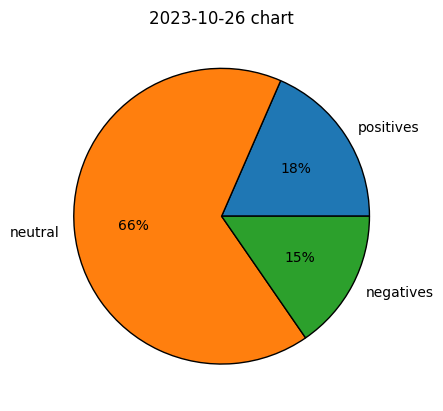

postives=12, neutral=43, negatives=10


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2717,Withdraw crypto to GBP (UK user) (x-post from /r/Bitcoin),1.698313e+09,1.00,1,0,BTC,0,2023-10-26 09:41:59
2718,How convenient… (x-post from /r/Bitcoin),1.698313e+09,1.00,1,0,BTC,0,2023-10-26 09:41:59
2557,"Let's assume Satoshi btc wallet gets activated and he try to sell 500,000 bitcoins will they get sold instantly or buyers will need to buy equivalent bitcoins.",1.698313e+09,1.00,1,1,BTC,0,2023-10-26 09:34:20
2720,Can you suggest the lowest fiat to crypto investment method . By which people in Dubai could invest ? (x-post from /r/Bitcoin),1.698312e+09,1.00,1,0,BTC,-1,2023-10-26 09:21:57
2719,3 billion bitcoiners before 2026 (x-post from /r/Bitcoin),1.698312e+09,1.00,1,0,BTC,0,2023-10-26 09:21:57
2572,3 billion bitcoiners before 2026,1.698311e+09,1.00,5,4,BTC,0,2023-10-26 09:03:57
2721,First time whole coiner (x-post from /r/Bitcoin),1.698311e+09,1.00,1,0,BTC,0,2023-10-26 09:01:55
2722,Future Presidential Elections surrounding BTC (Now Argentina) (x-post from /r/Bitcoin),1.698311e+09,1.00,1,0,BTC,0,2023-10-26 09:01:54
2573,Future Presidential Elections surrounding BTC (Now Argentina),1.698311e+09,0.50,0,1,BTC,0,2023-10-26 08:58:59
2723,Bitcoin is not a hedge | Parker Lewis at Old Parkland (x-post from /r/Cryptocurrency),1.698310e+09,1.00,1,0,BTC,0,2023-10-26 08:52:16


twitter Data


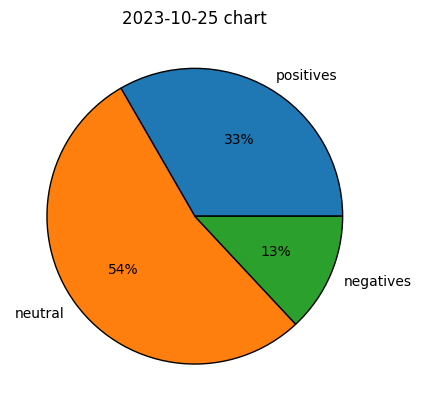

postives=23, neutral=37, negatives=9


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1502,"1,059 #BTC (36,530,931 USD) transferred from #BinanceUS to unknown wallethttps://whale-alert.io/transaction/bitcoin/9d0cfb5a962b3cdf644fa2dca0f908adbe0acb44c3acc4a43e7f282474bdba0a…",41.0,290.0,34.0,58000,1698276261,BTC,0,2023-10-25 23:24:21
1278,BITCOIN SPOT ETF IS INEVITABLE,204.0,1200.0,137.0,45000,1698275527,BTC,0,2023-10-25 23:12:07
1279,"OPENED A SMALL $BTC SHORT WITHA TIGH STOP LOSS AT $35,180 JUSTINCASE WE GET A SMALL CORRECTION",184.0,787.0,165.0,51000,1698270846,BTC,-1,2023-10-25 21:54:06
1280,BREAKING Bitwise Invest has submitted their amendment for their #Bitcoin ETF,187.0,912.0,120.0,42000,1698270635,BTC,0,2023-10-25 21:50:35
1271,What would Satoshi do? #bitcoin,37.0,283.0,162.0,39000,1698270364,BTC,0,2023-10-25 21:46:04
1355,"$BTC's market share of all cryptocurrencies – the Bitcoin Dominance index – rose to a fresh 30-month high of 54.4% Wednesday, with no sign of stopping @sndr_krisztian writes",7.0,69.0,28.0,22000,1698269475,BTC,1,2023-10-25 21:31:15
1462,"“80% of the wealth in America does not have access to #bitcoin and this is why an ETF will increase demand”, says @RasterlyRock.",312.0,1200.0,72.0,81000,1698269301,BTC,1,2023-10-25 21:28:21
1272,Don't forget to subscribe to us here on X. $BTC $ETH,10.0,165.0,60.0,24000,1698267827,BTC,0,2023-10-25 21:03:47
1358,Commissioner Summer Mersinger sheds light on #CryptocurrencyRegulation and #bitcoinETF at CoinDesk's State of Crypto Event with @mikejcasey & @sheila_warren insight from the expert! Download: Spotifyhttps://trib.al/CBTSiAG Apple,7.0,19.0,6.0,19000,1698267296,BTC,0,2023-10-25 20:54:56
1418,Bitcoin has now more doubled in value this year in a surprising resurgence from a tumultuous 2022 that had some skeptics predicting the demise of digital assets.,13.0,45.0,20.0,13000,1698265811,BTC,1,2023-10-25 20:30:11


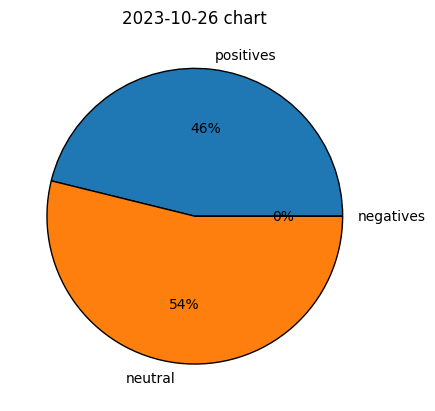

postives=6, neutral=7, negatives=0


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1487,Bitmain released the new bitcoin mining machine T21 with 19J/T and 190T. Customers get compensation in cash if BTC price falls below the strike for any reference day within the protected period. Price on a reference day = average BTC price for 24 hours (on the hour) on any…,7.0,35.0,6.0,3400,1698313545,BTC,1,2023-10-26 09:45:45
1340,$BTC's 30% price surge in two weeks has set the stage for a golden cross to confirm a long-term bullish bias. reports @godbole17.,14.0,55.0,14.0,7600,1698312575,BTC,0,2023-10-26 09:29:35
1275,Now imagine one day you wake up and We get “ Breaking News - multipleSpot Bitcoin ETFs are approved “Then Bitcoin Pumps straight to $50k,110.0,427.0,133.0,10000,1698311835,BTC,1,2023-10-26 09:17:15
1320,Pick three #altcoins that could pad your wallet! $BTC$ADA $SHIB $MATIC $DOGE $EGLD $CRO$MEE $FEG $ETH$SOL$XRP,7.0,39.0,87.0,3200,1698310858,BTC,0,2023-10-26 09:00:58
1401,Bitcoin has surged on bets the US will approve ETFs investing directly in the token — the question now is whether an actual green light for the products will trigger a bout of profit-taking,20.0,42.0,114.0,8000,1698303253,BTC,0,2023-10-26 06:54:13
1344,Popular meme tokens $DOGE and $SHIB jumped 9% in the past 24 hours in a move that suggested crypto traders were taking riskier bets following a week of $BTC outperformance. By @shauryamalwa.,15.0,81.0,32.0,19000,1698302634,BTC,0,2023-10-26 06:43:54
1277,"I will give $1,000 bitcoin to 5 people in next 24hrs. To join Just retweettag your friends and make sure you are following me.",2600.0,2200.0,1500.0,61000,1698300250,BTC,1,2023-10-26 06:04:10
1324,#Bitcoin is a ticket to Freedom!,15.0,105.0,151.0,4600,1698296425,BTC,1,2023-10-26 05:00:25
1499,"682 #BTC (23,695,707 USD) transferred from #GateIO to unknown wallethttps://whale-alert.io/transaction/bitcoin/6fa93e526d7324748c77c02df6ef219b8833c855e1c3bc974d7140476ad45be3…",24.0,166.0,22.0,47000,1698294501,BTC,0,2023-10-26 04:28:21
1501,"2,766 #BTC (96,205,508 USD) transferred from unknown wallet to #Coinbasehttps://whale-alert.io/transaction/bitcoin/c9f0777f80128bad0eb4e85ac63b9ed191e22ec65453ec27fe796d802b639332…",33.0,256.0,34.0,56000,1698292081,BTC,0,2023-10-26 03:48:01





ETH
Reddit Data


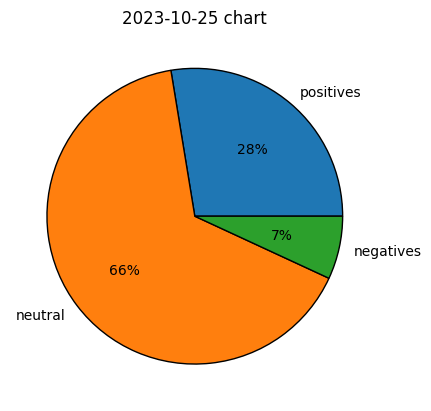

postives=8, neutral=19, negatives=2


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2820,Ethereum’s Eigen Layer may have a strong impact on liquid staking governance (x-post from /r/Cryptocurrency),1.698260e+09,1.00,1,0,ETH,1,2023-10-25 18:50:22
2499,Ethereum’s Eigen Layer may have a strong impact on liquid staking governance,1.698259e+09,0.45,0,14,ETH,1,2023-10-25 18:35:00
2667,Will Ethereum Rally Continue? These Could Be The Factors To Watch,1.698257e+09,0.82,11,38,ETH,0,2023-10-25 18:10:53
2832,Ethereum set for huge rally as whale activity hits 6-month high (x-post from /r/Cryptocurrency),1.698255e+09,1.00,1,0,ETH,1,2023-10-25 17:30:14
2834,Ethereum Founders: Gavin Wood (x-post from /r/Cryptocurrency),1.698255e+09,1.00,1,0,ETH,0,2023-10-25 17:30:13
2500,Ethereum Founders: Gavin Wood,1.698254e+09,0.61,11,24,ETH,0,2023-10-25 17:16:41
2502,Ethereum set for huge rally as whale activity hits 6-month high,1.698254e+09,0.66,33,31,ETH,1,2023-10-25 17:11:34
2842,Telegram trading bot Maestro developers refund users 610 ETH after router exploited for 280ETH worth of tokens. (x-post from /r/Cryptocurrency),1.698253e+09,1.00,1,0,ETH,-1,2023-10-25 16:50:09
2843,Ethereum’s Eigen Layer vs the Cosmos Hub’s Interchain Security (x-post from /r/Cryptocurrency),1.698253e+09,1.00,1,0,ETH,1,2023-10-25 16:50:09
2503,Ethereum’s Eigen Layer vs the Cosmos Hub’s Interchain Security,1.698253e+09,0.50,0,6,ETH,1,2023-10-25 16:49:39


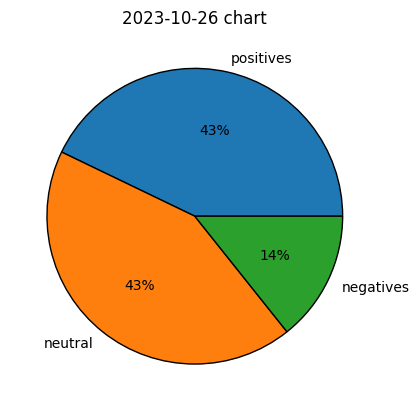

postives=3, neutral=3, negatives=1


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2677,Eth/eur no longer on Binance?,1.698313e+09,1.00,1,1,ETH,-1,2023-10-26 09:32:54
2648,Snapshot 27/9/23 to 24/10/23: Price Of Donuts + ETH Compared To Daily Comment Counts,1.698312e+09,1.00,4,9,ETH,0,2023-10-26 09:17:20
2653,"Ethereum Price Restarts Increase As Indicators Suggest Rally To $1,950",1.698303e+09,0.72,6,25,ETH,1,2023-10-26 06:52:08
2911,Polygon deploys smart contract for new token POL to Ethereum,1.698303e+09,1.00,1,2,ETH,1,2023-10-26 06:41:42
2655,"Ethereum Price Restarts Increase As Indicators Suggest Rally To $1,950",1.698299e+09,0.71,7,12,ETH,1,2023-10-26 05:36:24
2554,Polygon launches POL token contract on Ethereum to eventually replace MATIC,1.698292e+09,0.50,0,3,ETH,0,2023-10-26 03:53:15
2685,Think of swapping ETH for Solana. Why should I or why shouldn’t I?,1.698281e+09,0.83,19,33,ETH,0,2023-10-26 00:47:14


twitter Data


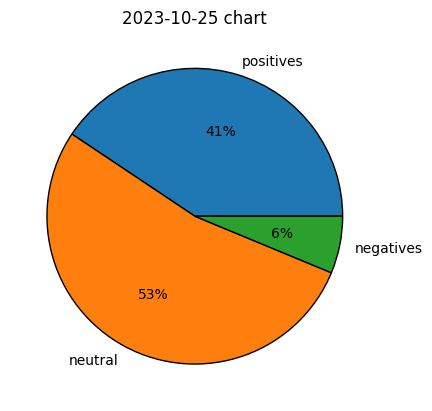

postives=13, neutral=17, negatives=2


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1363,It’s important to remember that traditional and #DigitalAssets are interconnected. In this week’s “Crypto Long & Short” I break down #Ethereum staking rate yield misconceptions (proxied by @coinfund_io @CoinDesk #CDI #CESR) and the interplay of #DeFi TVL and fixed income yields,4.0,17.0,6.0,30000,1698259283,ETH,1,2023-10-25 18:41:23
1368,"""Smart contracts of the upcoming $POL token went live on the #Ethereum #Mainnet as the #Polygon blockchain gears for a shift towards its ‘2.0’ plan...""Big news from @shauryamalwa for @CoinDesk https://coindesk.com/tech/2023/10/25/pol-contracts-go-live-on-ethereum-mainnet-as-part-of-polygon-20/…""The upgrade to #POL from #MATIC requires a simple…",4.0,20.0,6.0,17000,1698258905,ETH,1,2023-10-25 18:35:05
1506,"8,000,000 #MATIC (5,053,365 USD) transferred from #Binance to unknown wallethttps://whale-alert.io/transaction/ethereum/0xfb63e8590a42e722c80b4e4f4192a0d25b51a702a4958199b5bb5c2275340542…",20.0,231.0,24.0,58000,1698257676,ETH,0,2023-10-25 18:14:36
1361,I just went live to break down our brand new Index Coop CoinDesk ETH Trend Index (cdETI) Thanks @Tgroth8 from @CoinDesk Indices for joining us on stream!,2.0,26.0,7.0,30000,1698257349,ETH,1,2023-10-25 18:09:09
1507,"749 #WBTC (26,040,077 USD) transferred from #Binance to unknown wallethttps://whale-alert.io/transaction/ethereum/0x2c057c7fee090d8bfbc9ecdf46e62a1d0f7b39ff55f4d8cc1cfd8cd2af664511…",14.0,148.0,16.0,52000,1698256931,ETH,0,2023-10-25 18:02:11
1508,"749 #WBTC (26,007,260 USD) transferred from #GateIO to #Binancehttps://whale-alert.io/transaction/ethereum/0x501f523238538692fc92ecb4f91861603ef5515a2ecd1f2e834ebb15d86be6ee…",7.0,107.0,15.0,48000,1698256906,ETH,0,2023-10-25 18:01:46
1457,"Great week! I will giveaway $38,000 in $ETH to 5 lucky people (5 ETH each) today!Retweet this + Like + Drop your ETH address",215.0,285.0,212.0,12000,1698256000,ETH,1,2023-10-25 17:46:40
1372,Join us now as we discuss the Index Coop @CoinDesk ETH Trend Index with Todd Groth of CoinDesk Indices.,10.0,20.0,8.0,48000,1698253375,ETH,1,2023-10-25 17:02:55
1459,Drop your $ETH wallets and I'll send $2500Just RT & Follow me,192.0,209.0,196.0,7800,1698245652,ETH,-1,2023-10-25 14:54:12
1510,"27,147 #ETH (48,907,088 USD) transferred from unknown wallet to #Binancehttps://whale-alert.io/transaction/ethereum/0xa8143c8b90f59a8216603f2e317abc8a04d41c2cc79d549c70f9a84b19151a7a…",31.0,263.0,40.0,59000,1698244996,ETH,0,2023-10-25 14:43:16


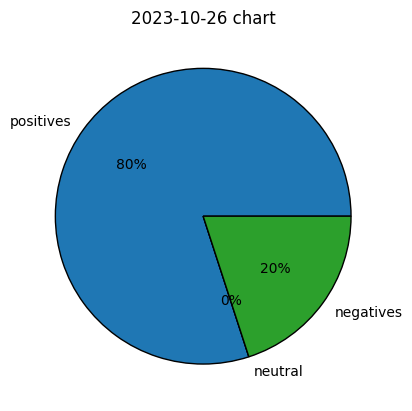

postives=4, neutral=0, negatives=1


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1342,"Wallets linked to the cold storage of bankrupt crypto exchange @FTX_Offical moved over $19 million worth of $SOL, $ETH and other tokens to crypto exchange addresses earlier Thursday, blockchain data shows. By @shauryamalwa",12.0,51.0,19.0,12000,1698310111,ETH,-1,2023-10-26 08:48:31
1296,"Join the #Binance trick-or-treat challenge to win your share of: 1 #ETH 10 #BNB 10,000 $USDTGet started https://app.binance.com/en/activity/mission/halloween?_dp=L3dlYnZpZXcvd2Vidmlldz90eXBlPWRlZmF1bHQmbmVlZExvZ2luPWZhbHNlJnVybD1hSFIwY0hNNkx5OTNkM2N1WW1sdVlXNWpaUzVqYjIwdlpXNHZZV04wYVhacGRIa3ZiV2x6YzJsdmJpOW9ZV3hzYjNkbFpXNA==…",105.0,451.0,144.0,95000,1698300000,ETH,1,2023-10-26 06:00:00
1472,Discover top #DeFi projects on #Optimism with highest Total Value Locked (TVL) growth last 24 hours! @DefiEdge @QiDaoProtocol @thalesmarket@SushiSwap@ConnextNetwork@Reaper_Farm@acryptosdao@mummyftm@rubicondefi@perpprotocol#Layer2 $ETH $OP #L2 $QI $THALES…,5.0,11.0,2.0,338,1698295738,ETH,1,2023-10-26 04:48:58
1347,FEATURE: A peek at the cybersecurity pros inside the @ethereum Foundation who get paid to hack the blockchain – for the good of the network @cryptauxmargaux reports $ETH,8.0,51.0,20.0,22000,1698282786,ETH,1,2023-10-26 01:13:06
1411,"Ethereum co-founder Joseph Lubin robbed his earliest employees of the value of stock awards that drew them to his blockchain firm, ex-workers allege",8.0,25.0,14.0,10000,1698278418,ETH,1,2023-10-26 00:00:18





ETC
Reddit Data


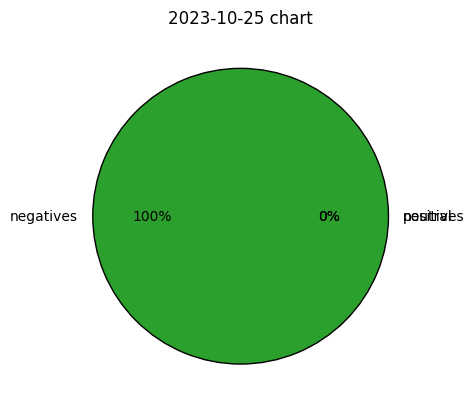

postives=0, neutral=0, negatives=1


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2609,Cash App? Strike? CoinBase? Etc…,1.698262e+09,0.67,2,8,ETC,-1,2023-10-25 19:30:32



the dataframe is empty in this day: 2023-10-26
twitter Data

the dataframe is empty in this day: 2023-10-25

the dataframe is empty in this day: 2023-10-26



Avalanche(AVAX)
Reddit Data


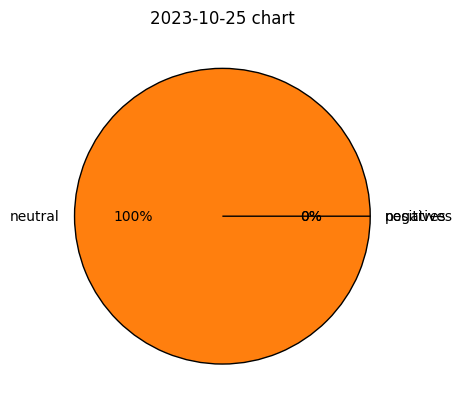

postives=0, neutral=3, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2700,Chainlink Automation 2.0 and Functions 1.0 are now live on Avalanche C-Chain 💪,1.698249e+09,1.0,20,10,Avalanche(AVAX),0,2023-10-25 15:55:14
2935,Chainlink Automation 2.0 and Functions 1.0 Transforming Web3 on Avalanche C-Chain,1.698249e+09,1.0,7,0,Avalanche(AVAX),0,2023-10-25 15:55:06
2325,Revolutionizing Insurance: Exploring Avalanche's Impact on the Industry,1.698231e+09,1.0,2,1,Avalanche(AVAX),0,2023-10-25 10:52:35


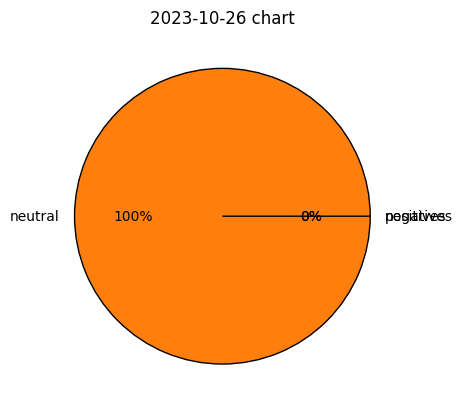

postives=0, neutral=1, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2697,wstETH is now available on AVAX,1.698284e+09,1.0,2,1,Avalanche(AVAX),0,2023-10-26 01:35:53


twitter Data


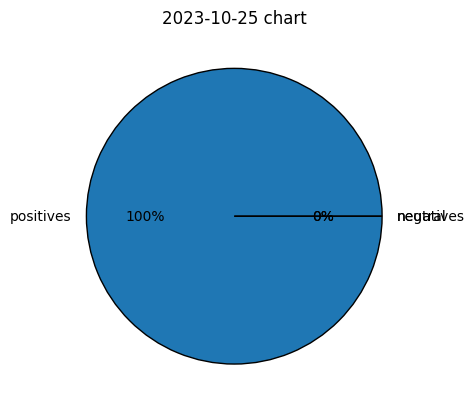

postives=2, neutral=0, negatives=0


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1274,"Lately I've been a bit addicted to @legendatwar on $Avax. It's really scratching an itch as a longtime fan of kingdom expansion strategy games like Tribal Wars and Civilization.The city building mechanics are great, with random immovables promoting variation in city builds.",11.0,43.0,8.0,9000,1698254503,Avalanche(AVAX),1,2023-10-25 17:21:43
1314,"#Chainlink Functions and Automation 2.0 are now live on @avax:• Access all of the world's APIs • Perform custom compute on any data• Reduce gas costs@AvaxDevelopers, welcome to the future of dApp development.",308.0,1300.0,30.0,111000,1698246191,Avalanche(AVAX),1,2023-10-25 15:03:11



the dataframe is empty in this day: 2023-10-26



Solana(SOL)
Reddit Data


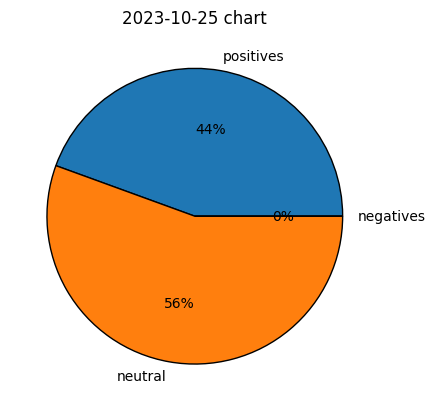

postives=4, neutral=5, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2687,"Solana Changelog - October 24 - NFT Locking, GetHealth, and Open Clockwork",1.698261e+09,1.00,10,1,Solana(SOL),0,2023-10-25 19:09:18
2688,Solana Drip Top Artist Donation Dashboard,1.698259e+09,0.82,7,1,Solana(SOL),1,2023-10-25 18:29:21
2689,Anyone with experience… How do I Become a Validator on Solana?,1.698253e+09,0.93,11,4,Solana(SOL),0,2023-10-25 17:03:27
2848,Web3 Social Media Platform DSCVR Launches on Solana Blockchain (x-post from /r/Cryptocurrency),1.698251e+09,1.00,1,0,Solana(SOL),0,2023-10-25 16:30:06
2508,Web3 Social Media Platform DSCVR Launches on Solana Blockchain,1.698250e+09,0.31,0,8,Solana(SOL),0,2023-10-25 16:11:58
2231,Are there any volunteer program on Solana?,1.698224e+09,1.00,2,1,Solana(SOL),0,2023-10-25 09:00:01
2234,Been Eyeing Solana for a While Now But I don’t Know if It’s still Worth it because I just saw the price now,1.698207e+09,0.64,6,43,Solana(SOL),1,2023-10-25 04:01:47
2235,CoinShares Report: Solana Tops the Charts in Institutional Investments,1.698197e+09,1.00,9,1,Solana(SOL),1,2023-10-25 01:21:45
2236,"I can't stake SOL with Coinbase anymore, where can I safely stake it now?",1.698193e+09,0.89,13,29,Solana(SOL),1,2023-10-25 00:24:26


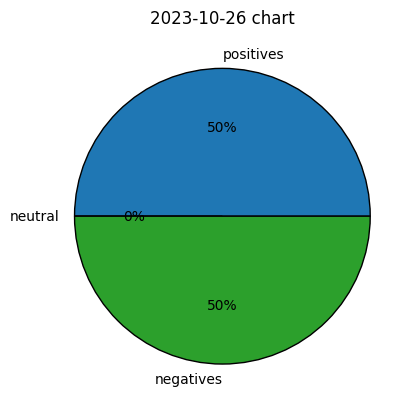

postives=1, neutral=0, negatives=1


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2683,"Vote for Solana? (Looking for feedback about which blockchain to build a game on, thank you!)",1.698311e+09,1.00,2,1,Solana(SOL),1,2023-10-26 09:06:19
2658,Wrapped coins on SOL not safe at all!,1.698283e+09,0.76,13,28,Solana(SOL),-1,2023-10-26 01:08:59


twitter Data


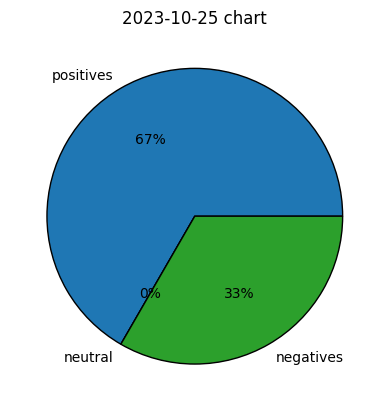

postives=2, neutral=0, negatives=1


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1481,"Solana is only possible because of people like you.A global ecosystem that shows up every day.Come for the tech, stay for the community. #OnlyPossibleOnSolanaJoin the movement: http://solana.com/possible",200.0,791.0,42.0,56000,1698256956,Solana(SOL),1,2023-10-25 18:02:36
1485,Get ready for Breakpoint starter packs via TipLink - only claimable at @SolanaConf!Each attendee will receive a unique pack with tokens and NFTs from various teams at registration.@Tensor_hq @MonkeDAO @EUROemoney @Samoyedcoin @sayDialect @StarAtlas @Bonk_inu @AssetDash,71.0,213.0,28.0,42000,1698249707,Solana(SOL),1,2023-10-25 16:01:47
1483,"One of the worst things to deal with on a block explorer: slow-loading data, or no data at all.Don’t waste your time switching between RPCs — we’ll pick the provider so you dont have to.Introducing SolanaFM’s RPC Multiplexer.",26.0,107.0,2.0,22000,1698245377,Solana(SOL),-1,2023-10-25 14:49:37



the dataframe is empty in this day: 2023-10-26



Monero(XMR)
Reddit Data


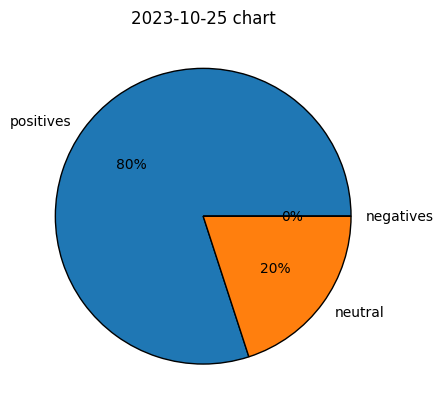

postives=4, neutral=1, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2695,MoneroSilver.com 6-month update,1.698276e+09,1.00,23,5,Monero(XMR),0,2023-10-25 23:24:41
2215,Please Fix ExploreMonero.com,1.698223e+09,1.00,3,0,Monero(XMR),1,2023-10-25 08:28:52
2247,Please Fix ExploreMonero.com,1.698223e+09,1.00,3,0,Monero(XMR),1,2023-10-25 08:28:52
2217,Reminder: there's 19.75 XMR worth of bounties to be claimed for contributing to the Passport Monero hardware wallet,1.698211e+09,1.00,14,3,Monero(XMR),1,2023-10-25 05:18:48
2249,Reminder: there's 19.75 XMR worth of bounties to be claimed for contributing to the Passport Monero hardware wallet,1.698211e+09,0.95,14,3,Monero(XMR),1,2023-10-25 05:18:48



the dataframe is empty in this day: 2023-10-26
twitter Data

the dataframe is empty in this day: 2023-10-25

the dataframe is empty in this day: 2023-10-26



Optimism(OP)
Reddit Data

the dataframe is empty in this day: 2023-10-25

the dataframe is empty in this day: 2023-10-26
twitter Data


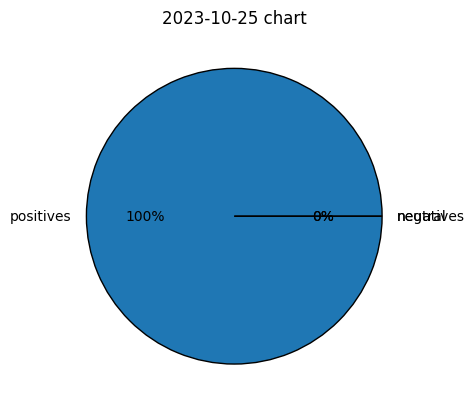

postives=2, neutral=0, negatives=0


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1473,Explore top projects on the #Optimism network with highest number of active accounts last 7 days! @StargateFinance @VelodromeFi @matchaxyz@Galxe@synthetix_io@Orbiter_Finance@Uniswap@LayerZero_Labs@thalesmarket@PolynomialFi$OP #Layer2,NaN,2.0,1.0,104,1698248767,Optimism(OP),1,2023-10-25 15:46:07
1197,Discover top DEXes with highest trading volume last 24 hours on the #Optimism network! @Uniswap @KyberNetwork @CurveFinance@VelodromeFi@mummyftm@_WOOFi@beethoven_x@opxfinance@rubicondefi@SushiSwap$OP #Layer2 #DEX,NaN,NaN,NaN,91,1698205237,Optimism(OP),1,2023-10-25 03:40:37



the dataframe is empty in this day: 2023-10-26



PAX Gold(PAXG)
Reddit Data

the dataframe is empty in this day: 2023-10-25

the dataframe is empty in this day: 2023-10-26
twitter Data

the dataframe is empty in this day: 2023-10-25

the dataframe is empty in this day: 2023-10-26



Ripple(XRP)
Reddit Data


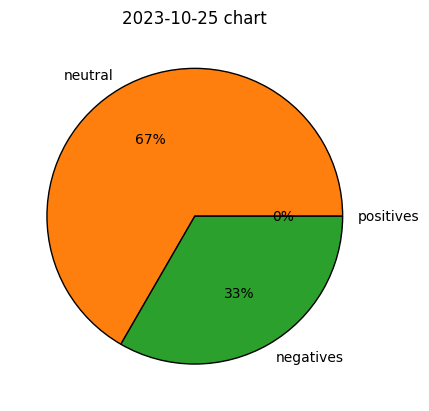

postives=0, neutral=2, negatives=1


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2908,If XRP hits $5 by the end of the year,1.698261e+09,0.75,100,103,Ripple(XRP),0,2023-10-25 19:17:26
2894,XRP Lawyer Backs Coinbase in SEC’s Investment Contract Dispute,1.698241e+09,1.00,1,0,Ripple(XRP),-1,2023-10-25 13:41:06
2258,Will Ripple IPO in 2024? SEC Ripple XRP Ruling with Linqto Ray Fuentes,1.698238e+09,1.00,1,0,Ripple(XRP),0,2023-10-25 12:53:00


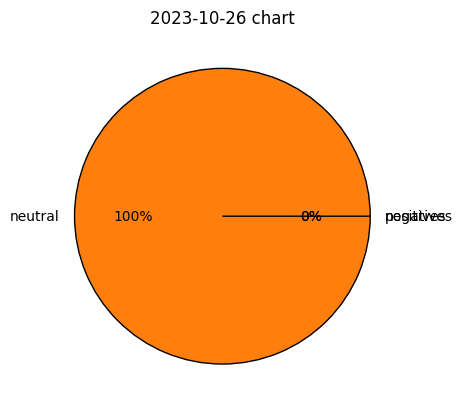

postives=0, neutral=1, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2906,Swapping bnb xrp,1.698284e+09,0.88,6,13,Ripple(XRP),0,2023-10-26 01:28:10


twitter Data


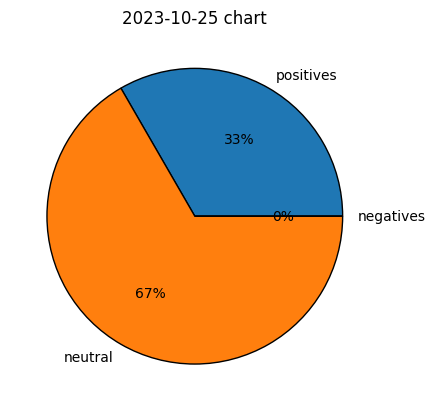

postives=1, neutral=2, negatives=0


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1480,"#RippleSwell brings together the brightest minds from the realms of crypto, blockchain, payments, financial services, and economic policy. Request your invite to join us on November 8-9 in Dubai.Registration ends soon: https://bit.ly/RippleSwell2023",528.0,1700.0,68.0,133000,1698273991,Ripple(XRP),1,2023-10-25 22:46:31
1503,"20,000,000 #XRP (11,115,098 USD) transferred from unknown wallet to #Bitsohttps://whale-alert.io/transaction/ripple/4DB4E96E7B01BB979ACADEF0657D8D58AB6DB85BDC0C64671671D7B29907D42F…",27.0,186.0,22.0,54000,1698262890,Ripple(XRP),0,2023-10-25 19:41:30
1504,"26,500,000 #XRP (14,735,487 USD) transferred from unknown wallet to #Bitstamphttps://whale-alert.io/transaction/ripple/C6844D704C54FF35CF844BBFBC7813C419F63F1008719AB7632B242181CB0B51…",23.0,147.0,20.0,50000,1698262830,Ripple(XRP),0,2023-10-25 19:40:30



the dataframe is empty in this day: 2023-10-26



Arbitrum(ARB)
Reddit Data


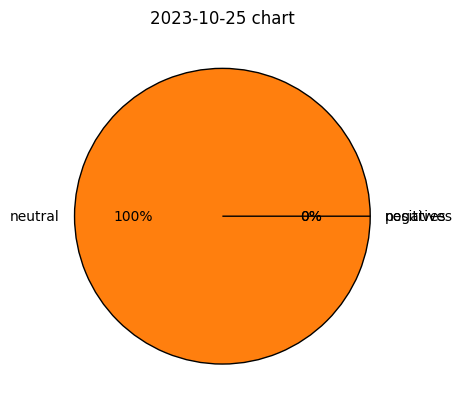

postives=0, neutral=1, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2901,What are the most fund dapps to use on Arbitrum at the moment?,1.698254e+09,1.0,1,0,Arbitrum(ARB),0,2023-10-25 17:21:17


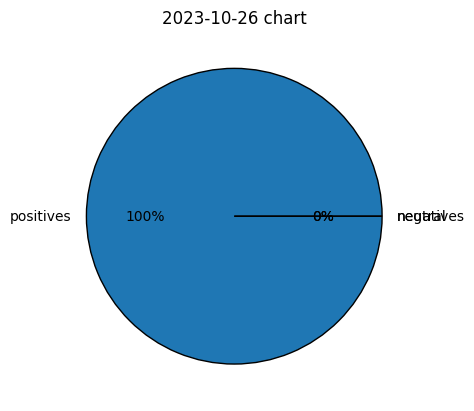

postives=1, neutral=0, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2900,Arbitrum Ecosystem: A Comprehensive Look Using the Bitquery API​,1.698306e+09,1.0,1,0,Arbitrum(ARB),1,2023-10-26 07:46:13


twitter Data

the dataframe is empty in this day: 2023-10-25

the dataframe is empty in this day: 2023-10-26



Binance(BNB)
Reddit Data


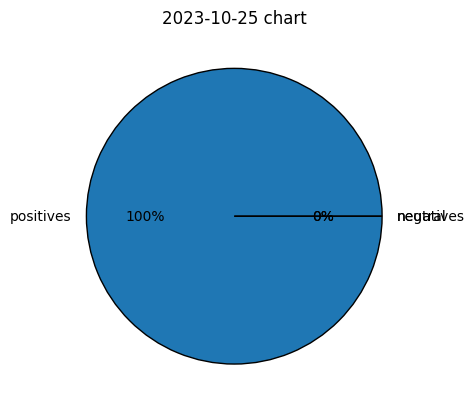

postives=2, neutral=0, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2938,Binance Chain's 1% Daily Staking: Your Path to Steady Gains with BNB!,1.698262e+09,1.0,1,0,Binance(BNB),1,2023-10-25 19:22:44
2448,Binance Chain's 1% Daily Staking: Your Path to Steady Gains with BNB!,1.698258e+09,1.0,1,1,Binance(BNB),1,2023-10-25 18:21:52


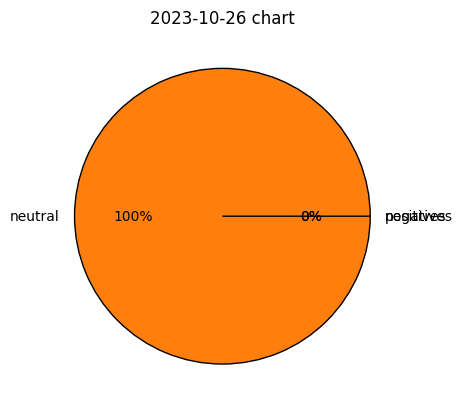

postives=0, neutral=2, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2392,A Microcap with 3880 bnb in reserve capital! Over 60% of supply burnt,1.698293e+09,0.5,0,1,Binance(BNB),0,2023-10-26 04:11:26
2937,MINE-BNB [2023] referral link [2024],1.698292e+09,1.0,1,0,Binance(BNB),0,2023-10-26 03:46:00


twitter Data

the dataframe is empty in this day: 2023-10-25

the dataframe is empty in this day: 2023-10-26



Cardano(ADA)
Reddit Data


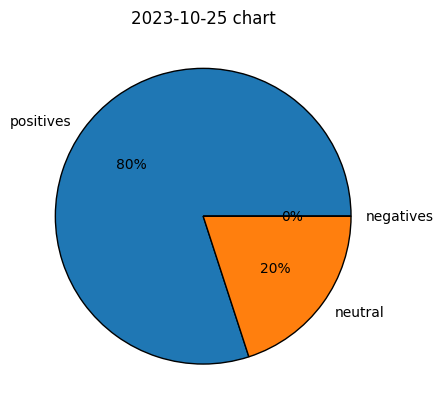

postives=4, neutral=1, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2927,Join us as we chat with Sustainable ADA founders Cole and Raz! Learn about the power of storytelling and how blockchain technology can be used to fight for a better world.,1.698270e+09,0.75,2,1,Cardano(ADA),1,2023-10-25 21:45:15
2928,Cardano Summit 2023 Twitter Spaces! Set reminder now!,1.698264e+09,0.83,11,1,Cardano(ADA),0,2023-10-25 20:08:16
2713,"Cardano Boosts Stablecoin Venture, Refutes Djed Shutdown Rumors",1.698257e+09,1.00,1,0,Cardano(ADA),1,2023-10-25 18:05:29
2545,"Cardano Boosts Stablecoin Venture, Refutes Djed Shutdown Rumors",1.698257e+09,1.00,1,0,Cardano(ADA),1,2023-10-25 18:05:28
2825,"Cardano Boosts Stablecoin Venture, Refutes Djed Shutdown Rumors",1.698257e+09,1.00,1,0,Cardano(ADA),1,2023-10-25 18:05:28


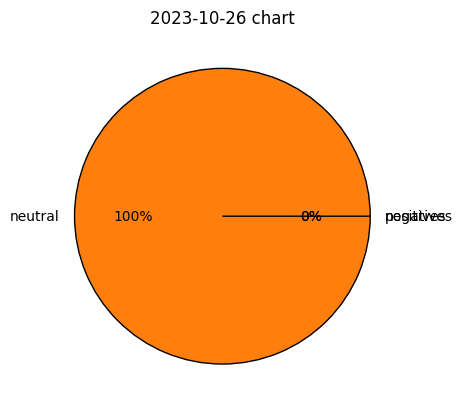

postives=0, neutral=2, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2922,Can someone catch me up on Cardano?,1.698301e+09,0.95,14,13,Cardano(ADA),0,2023-10-26 06:23:41
2924,What is Cardanoscan.io,1.698295e+09,1.00,3,5,Cardano(ADA),0,2023-10-26 04:38:43


twitter Data


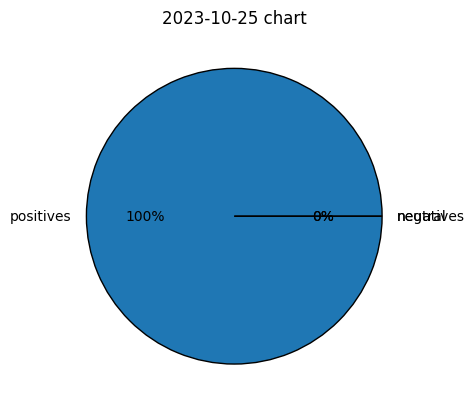

postives=1, neutral=0, negatives=0


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1319,Let's Celebrate #Cardano and the #CardanoCommunity Together!! Register for a local event: https://summit.cardano.org/community-led-events/…Attend virtually: https://summit.cardano.org/virtual-attendance/…,24.0,127.0,10.0,43000,1698251705,Cardano(ADA),1,2023-10-25 16:35:05



the dataframe is empty in this day: 2023-10-26



Cosmos(ATOM)
Reddit Data


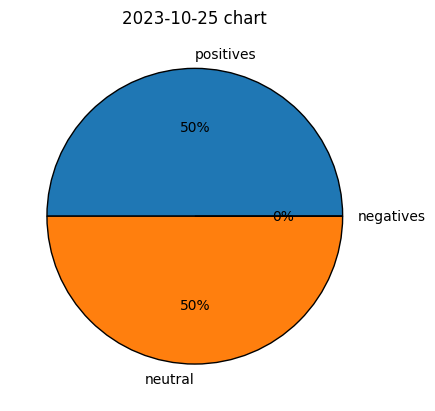

postives=3, neutral=3, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2917,Cosmos Roundup: News From Around the interchain!,1.698267e+09,1.00,5,0,Cosmos(ATOM),0,2023-10-25 20:50:23
2918,"Introducing a ONE-click bridge solution, making USDT transfers into Cosmos chains a breeze.",1.698265e+09,0.84,4,1,Cosmos(ATOM),1,2023-10-25 20:16:16
2808,The Cosmos Hubs Premium Security Provider: Anatomy of the Interchain Security Stack (x-post from /r/Cryptocurrency),1.698263e+09,1.00,1,0,Cosmos(ATOM),1,2023-10-25 19:50:29
2496,The Cosmos Hubs Premium Security Provider: Anatomy of the Interchain Security Stack,1.698263e+09,0.65,9,15,Cosmos(ATOM),1,2023-10-25 19:38:02
2920,Is there any cosmos community-building program or projects in India?,1.698250e+09,0.60,1,2,Cosmos(ATOM),0,2023-10-25 16:10:45
2402,"$CRBRUS, a Cosmos ecosystem memecoin token stranded on the Osmosis",1.698249e+09,1.00,2,1,Cosmos(ATOM),0,2023-10-25 15:43:06


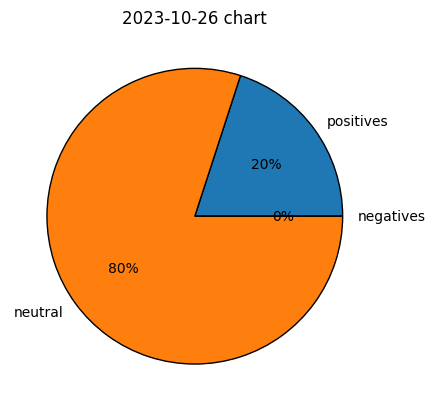

postives=1, neutral=4, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2913,Cosmos Hub surged #29 by MC,1.698312e+09,1.0,1,0,Cosmos(ATOM),0,2023-10-26 09:26:12
2725,"“Atom Computing is the first to announce a 1,000+ qubit quantum computer” - What does this mean for crypto? (x-post from /r/Cryptocurrency)",1.698309e+09,1.0,1,0,Cosmos(ATOM),0,2023-10-26 08:32:13
2483,"“Atom Computing is the first to announce a 1,000+ qubit quantum computer” - What does this mean for crypto?",1.698308e+09,0.4,0,5,Cosmos(ATOM),0,2023-10-26 08:20:48
2914,ATOM's Total Stake Dynamics,1.698307e+09,1.0,1,0,Cosmos(ATOM),1,2023-10-26 07:53:38
2915,The ATOM to INJ exchange rate has been wild,1.698283e+09,0.7,4,8,Cosmos(ATOM),0,2023-10-26 01:08:27


twitter Data


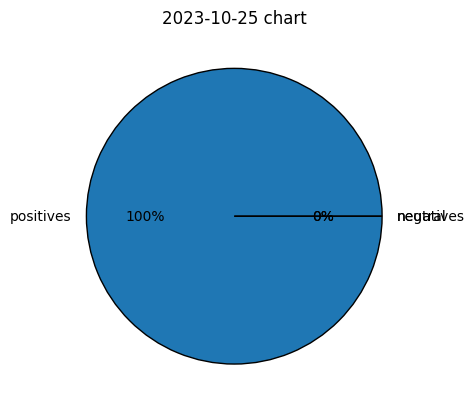

postives=1, neutral=0, negatives=0


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1317,"Cosmonauts, Interchain Jam Season 1 is in the books!The first Cosmos native podcast saw 18 episodes running from Apr to Oct.Thanks to @chjango for pioneering the series as host and for the valuable content provided.The 2nd season is confirmed and we need your feedback",47.0,168.0,8.0,12000,1698241695,Cosmos(ATOM),1,2023-10-25 13:48:15



the dataframe is empty in this day: 2023-10-26



Litecoin(LTC)
Reddit Data

the dataframe is empty in this day: 2023-10-25

the dataframe is empty in this day: 2023-10-26
twitter Data


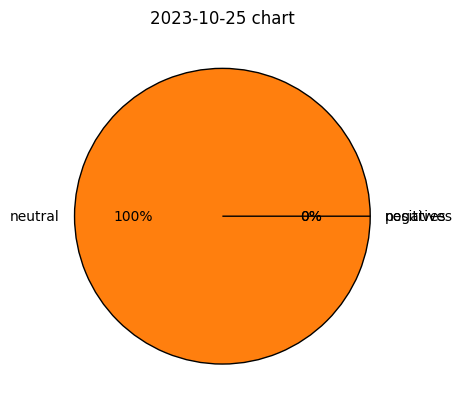

postives=0, neutral=1, negatives=0


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1471,The Average Transaction Fee for the last 144 blocks... $0.01#Litecoin,85.0,320.0,22.0,16000,1698254203,Litecoin(LTC),0,2023-10-25 17:16:43



the dataframe is empty in this day: 2023-10-26



Chainlink(LINK)
Reddit Data


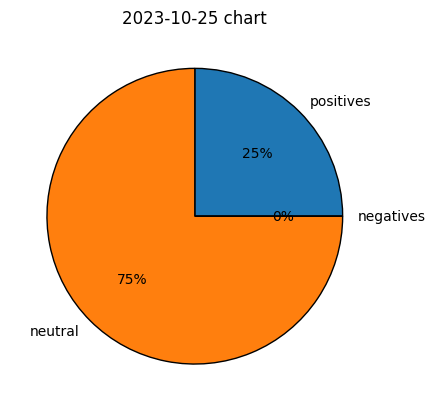

postives=1, neutral=3, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2934,Chainlink oracle to call python or any other scripts,1.698254e+09,0.83,4,3,Chainlink(LINK),0,2023-10-25 17:14:17
2936,Chainlink Staking v0.2 - How does it work?,1.698241e+09,1.00,10,5,Chainlink(LINK),0,2023-10-25 13:41:53
2388,vodafone-chainlink-show-blockchain-can-support-global-trade-processes,1.698238e+09,1.00,2,0,Chainlink(LINK),0,2023-10-25 12:41:18
2273,"What Is Chainlink (LINK)? Learn how Chainlink, a decentralised oracle network, bridges the gap between smart contracts and real-world data.",1.698235e+09,0.67,1,0,Chainlink(LINK),1,2023-10-25 11:58:19



the dataframe is empty in this day: 2023-10-26
twitter Data


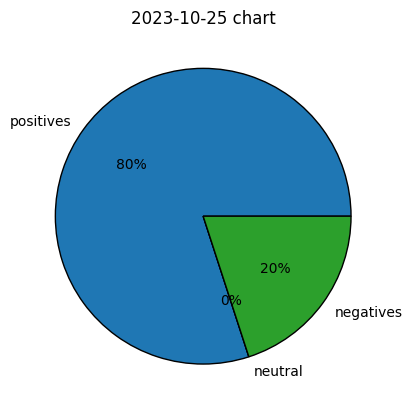

postives=4, neutral=0, negatives=1


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1312,NOW LIVE:Learn the basics of #Chainlink CCIP's Risk Management Network with @ChainlinkLabs CCIP Market Strategy Manager @pieterpauwels. Tune into the Twitter Spaces,62.0,373.0,18.0,19000,1698270959,Chainlink(LINK),-1,2023-10-25 21:55:59
1313,"""This is my chance and the chance of the many people working on Chainlink to make an indelible, lasting mark on how the world works""—@SergeyNazarov. Why Sergey is committed to building #Chainlink",217.0,1000.0,32.0,47000,1698253620,Chainlink(LINK),1,2023-10-25 17:07:00
1315,"#ChainlinkBUILD @FydeTreasury is joining Chainlink BUILD to gain enhanced access to Chainlink's industry-leading oracle services and technical support, which helps support Web3 treasury management infrastructure.In return, Fyde will make 3% of its total native token…",103.0,701.0,40.0,44000,1698242627,Chainlink(LINK),1,2023-10-25 14:03:47
1316,Chainlink unlocks tokenization's global potential by enabling:• Secondary markets to settle tokenized assets on any blockchain• DvP settlement workflows via atomic asset swaps• Onchain and offchain synchronizationDiscover the new onchain erahttps://blog.chain.link/tokenization-for-capital-markets/…,337.0,1500.0,34.0,77000,1698235078,Chainlink(LINK),1,2023-10-25 11:57:58
1393,".@VodafoneGroup, @chainlink and others teamed up on a proof of concept that shows blockchain can support global trade document transfers. By @camomileshumba",116.0,419.0,50.0,48000,1698234602,Chainlink(LINK),1,2023-10-25 11:50:02



the dataframe is empty in this day: 2023-10-26



Aave(AAVE)
Reddit Data

the dataframe is empty in this day: 2023-10-25

the dataframe is empty in this day: 2023-10-26
twitter Data

the dataframe is empty in this day: 2023-10-25

the dataframe is empty in this day: 2023-10-26



Polygon(MATIC)
Reddit Data


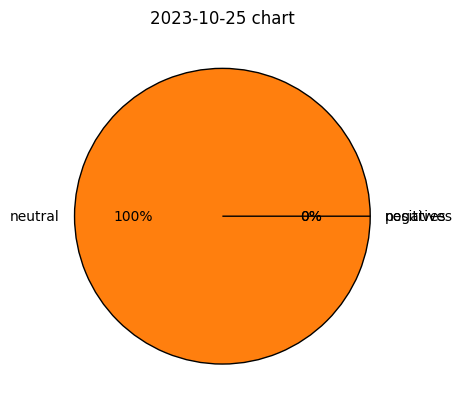

postives=0, neutral=1, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2518,Deposits and withdrawals of native $USDC on Polygon PoS are enabled on the Crypto.com App.,1.698244e+09,1.0,12,0,Polygon(MATIC),0,2023-10-25 14:20:01


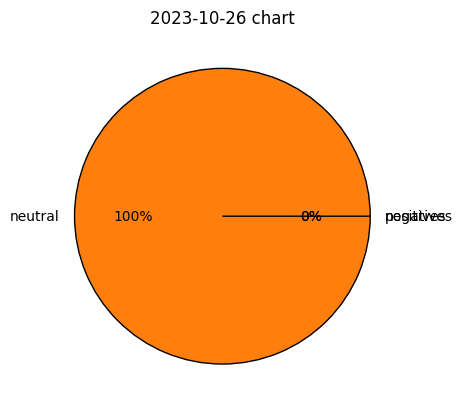

postives=0, neutral=1, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
2912,Daily Polygon Discussion Thread,1.698298e+09,1.0,1,0,Polygon(MATIC),0,2023-10-26 05:30:12


twitter Data


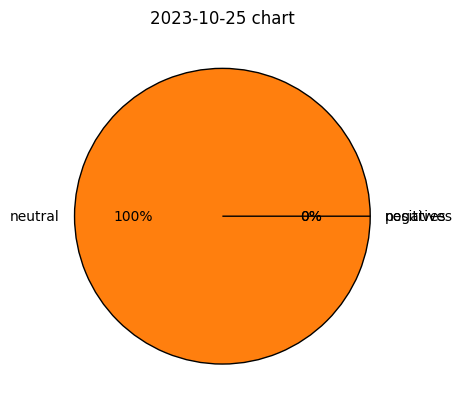

postives=0, neutral=1, negatives=0


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1476,"A book where action isn’t just a genre.Blockchain technology has the potential to scale lasting impact on the world, and as the base layer for collaboration with climate action leaders, @0xPolygon is being used by projects to prove planet-positive impact via traceability,…",52.0,217.0,13.0,31000,1698270297,Polygon(MATIC),0,2023-10-25 21:44:57



the dataframe is empty in this day: 2023-10-26


In [52]:
startDateObject=datetime.date(2023,10,25)
endDateObject=datetime.date(2023,10,26)

coinNames =[
"BTC",
"ETH", 
"ETC",
"Avalanche(AVAX)",
"Solana(SOL)",
"Monero(XMR)",
"Optimism(OP)",
"PAX Gold(PAXG)",
"Ripple(XRP)", 
"Arbitrum(ARB)",
"Binance(BNB)",
"Cardano(ADA)",
"Cosmos(ATOM)",
"Litecoin(LTC)",
"Chainlink(LINK)", 
"Aave(AAVE)",
"Polygon(MATIC)",
]

for coinName in coinNames:
    print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+f"\n\n\n{coinName}")
    print("Reddit Data")
    print_sentiment_anayled_piechart_of_coin(start_dateObj=startDateObject,end_dateObj=endDateObject,dataFrame=pd.read_csv('data/reddit_data.csv'),coinName=coinName)
    print(Style.BRIGHT+Back.MAGENTA+Fore.LIGHTCYAN_EX+"twitter Data")
    print_sentiment_anayled_piechart_of_coin(start_dateObj=startDateObject,end_dateObj=endDateObject,dataFrame=pd.read_csv('data/twitter_data.csv'),coinName=coinName)
